# 🐦 Twitter Comprehensive Analysis Notebook

**Interactive notebook for Twitter data extraction with date filtering capabilities**

---

## 📋 Features
- **Account selection and parameter configuration**
- **Date filtering for incremental extraction**  
- **Real-time job monitoring**
- **Result file validation and inspection**
- **Performance metrics and analysis**

## 🚀 Quick Start
1. Configure your target account and parameters in the cells below
2. Run the extraction job
3. Monitor progress and analyze results
4. Inspect extracted data for validation

## 📦 Setup and Imports

In [1]:
import os
import requests

# Configuration
API_URL = "http://browser:8080"  # Use service name for Docker internal communication
RESULTS_DIR = "/storage/scraped_data/twitter"  # Path from notebook container perspective

print("🐦 Twitter Analysis Notebook Initialized!")
print(f"📍 API URL: {API_URL}")
print(f"📁 Results Directory: {RESULTS_DIR}")

# Debug: Check if results directory exists and is accessible
if os.path.exists(RESULTS_DIR):
    print(f"✅ Results directory accessible")
    try:
        recent_jobs = sorted([d for d in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, d))], reverse=True)[:3]
        if recent_jobs:
            print(f"📂 Recent job directories: {recent_jobs}")
    except Exception as e:
        print(f"⚠️ Could not list recent jobs: {e}")
else:
    print(f"⚠️ Results directory not found at {RESULTS_DIR}")
    print("🔍 Searching for alternative paths...")
    alt_paths = [
        "/home/aub/boo/Qitta/backend/storage/scraped_data/twitter",
        "../storage/scraped_data/twitter", 
        "./storage/scraped_data/twitter"
    ]
    for alt_path in alt_paths:
        if os.path.exists(alt_path):
            print(f"✅ Found alternative path: {alt_path}")
            RESULTS_DIR = alt_path
            break

🐦 Twitter Analysis Notebook Initialized!
📍 API URL: http://browser:8080
📁 Results Directory: /storage/scraped_data/twitter
✅ Results directory accessible
📂 Recent job directories: ['cf9caed796c4493c9f95bd9e24920925', '92493b211593411a8be151bf1681246b', '70b038a8e08448d2b08e5e8c18b70532']


## 📅 Date Filtering Options

**Available predefined ranges for performance optimization:**

In [2]:
# Display date filtering options
date_options = {
    "today": "Current day only (90-95% faster)",
    "last_day": "Last 24 hours (90-95% faster)", 
    "last_3_days": "Last 3 days (80-90% faster)",
    "last_week": "Last 7 days (70-85% faster)",
    "last_2_weeks": "Last 14 days (60-80% faster)",
    "last_month": "Last 30 days (50-70% faster)",
    "last_3_months": "Last 90 days (30-50% faster)"
}

print("📅 PREDEFINED DATE RANGES:")
for range_name, description in date_options.items():
    print(f"   • '{range_name}': {description}")

print("\n📝 CUSTOM RANGES:")
print("   • Set start_date and end_date (format: '2024-01-15')")
print("   • Supports multiple date formats")
print("   • Enable stop_at_date_threshold for early termination")

📅 PREDEFINED DATE RANGES:
   • 'today': Current day only (90-95% faster)
   • 'last_day': Last 24 hours (90-95% faster)
   • 'last_3_days': Last 3 days (80-90% faster)
   • 'last_week': Last 7 days (70-85% faster)
   • 'last_2_weeks': Last 14 days (60-80% faster)
   • 'last_month': Last 30 days (50-70% faster)
   • 'last_3_months': Last 90 days (30-50% faster)

📝 CUSTOM RANGES:
   • Set start_date and end_date (format: '2024-01-15')
   • Supports multiple date formats
   • Enable stop_at_date_threshold for early termination


## 🔧 Extraction Configuration

**Customize your extraction parameters below:**

In [3]:
# 🎯 CONFIGURATION SECTION - MODIFY THESE VALUES
extraction_config = {
    # Target Account (change this to your desired account)
    "username": "naval",  # Options: naval, elonmusk, sama, paulg, vitalikbuterin, or any username
    
    # Core extraction settings
    "scrape_posts": True,
    "max_posts": 50,
    "scrape_likes": False,  # Set to True if you want likes
    "max_likes": 30,
    "scrape_mentions": False,  # Set to True if you want mentions
    "max_mentions": 20,
    "scrape_media": False,  # Set to True if you want media
    "max_media": 15,
    "scrape_followers": False,  # Set to True if you want followers
    "max_followers": 100,
    "scrape_following": False,  # Set to True if you want following
    "max_following": 50,
    
    # 🆕 DATE FILTERING CONFIGURATION (KEY FEATURE!)
    "enable_date_filtering": True,  # Enable for performance boost
    "date_range": "last_week",      # Options: today, last_day, last_week, last_month, etc.
    "start_date": "",               # Custom start date (e.g., "2024-01-15")
    "end_date": "",                 # Custom end date (e.g., "2024-01-31")
    "stop_at_date_threshold": True, # Stop when reaching date boundary
    
    # Advanced settings
    "level": 4  # Extraction depth
}

# Display current configuration
print("📋 CURRENT CONFIGURATION:")
print(f"   🎯 Target: @{extraction_config['username']}")
print(f"   📝 Posts: {extraction_config['max_posts']} (enabled: {extraction_config['scrape_posts']})")
print(f"   ❤️ Likes: {extraction_config['max_likes']} (enabled: {extraction_config['scrape_likes']})")
print(f"   @️⃣ Mentions: {extraction_config['max_mentions']} (enabled: {extraction_config['scrape_mentions']})")
print(f"   🖼️ Media: {extraction_config['max_media']} (enabled: {extraction_config['scrape_media']})")
print(f"   👥 Followers: {extraction_config['max_followers']} (enabled: {extraction_config['scrape_followers']})")
print(f"   ➡️ Following: {extraction_config['max_following']} (enabled: {extraction_config['scrape_following']})")
print(f"   📅 Date Filter: {extraction_config['date_range']} (enabled: {extraction_config['enable_date_filtering']})")
print(f"   ⏹️ Early Stop: {extraction_config['stop_at_date_threshold']}")

# Calculate expected performance improvement
if extraction_config['enable_date_filtering']:
    date_range = extraction_config['date_range']
    if date_range in ['today', 'last_day']:
        improvement = "90-95%"
    elif date_range in ['last_3_days', 'last_week']:
        improvement = "70-90%"
    elif date_range == 'last_month':
        improvement = "50-70%"
    else:
        improvement = "varies"
    print(f"   ⚡ Expected Performance Boost: {improvement} faster")
else:
    print(f"   ℹ️ Full extraction mode - no date filtering")

📋 CURRENT CONFIGURATION:
   🎯 Target: @naval
   📝 Posts: 50 (enabled: True)
   ❤️ Likes: 30 (enabled: False)
   @️⃣ Mentions: 20 (enabled: False)
   🖼️ Media: 15 (enabled: False)
   👥 Followers: 100 (enabled: False)
   ➡️ Following: 50 (enabled: False)
   📅 Date Filter: last_week (enabled: True)
   ⏹️ Early Stop: True
   ⚡ Expected Performance Boost: 70-90% faster


## ✅ Parameter Validation

In [4]:
def validate_extraction_config(config):
    """Validate the extraction configuration"""
    print("🔍 PARAMETER VALIDATION:")
    validation_results = []
    
    # Username validation
    if not config.get("username"):
        validation_results.append("❌ Username is required")
    else:
        # Clean username
        if config["username"].startswith("@"):
            config["username"] = config["username"][1:]
            validation_results.append("✅ Username format corrected")
        else:
            validation_results.append("✅ Username valid")
    
    # Date filtering validation
    if config.get("enable_date_filtering"):
        if config.get("date_range"):
            valid_ranges = ["today", "last_day", "last_3_days", "last_week", 
                          "last_2_weeks", "last_month", "last_3_months"]
            if config["date_range"] in valid_ranges:
                validation_results.append("✅ Date range valid")
            else:
                validation_results.append("⚠️ Invalid date range, will use default")
        elif config.get("start_date") or config.get("end_date"):
            validation_results.append("✅ Custom date range detected")
        else:
            validation_results.append("⚠️ Date filtering enabled but no range specified")
    else:
        validation_results.append("ℹ️ Date filtering disabled (full extraction)")
    
    # Volume validation
    total_items = sum([
        config.get("max_posts", 0) if config.get("scrape_posts") else 0,
        config.get("max_likes", 0) if config.get("scrape_likes") else 0,
        config.get("max_mentions", 0) if config.get("scrape_mentions") else 0,
        config.get("max_media", 0) if config.get("scrape_media") else 0,
        config.get("max_followers", 0) if config.get("scrape_followers") else 0,
        config.get("max_following", 0) if config.get("scrape_following") else 0
    ])
    
    if total_items == 0:
        validation_results.append("⚠️ No data types enabled for extraction")
    elif total_items > 500:
        validation_results.append(f"⚠️ Large extraction ({total_items} items) - consider date filtering")
    else:
        validation_results.append(f"✅ Reasonable extraction size ({total_items} items)")
    
    # Print results
    for result in validation_results:
        print(f"   {result}")
    
    # Check for critical issues
    critical_issues = [r for r in validation_results if "❌" in r]
    if critical_issues:
        print("\n⚠️ CRITICAL VALIDATION ISSUES FOUND!")
        print("Please fix the configuration before proceeding.")
        return False
    
    print("\n✅ Configuration validated successfully!")
    return True

# Validate current configuration
is_valid = validate_extraction_config(extraction_config)

🔍 PARAMETER VALIDATION:
   ✅ Username valid
   ✅ Date range valid
   ✅ Reasonable extraction size (50 items)

✅ Configuration validated successfully!


## 🚀 Submit Extraction Job

In [5]:
def submit_extraction_job(config):
    """Submit extraction job to the API"""
    if not is_valid:
        print("❌ Cannot submit job - configuration validation failed")
        return None
    
    print("🚀 SUBMITTING EXTRACTION JOB")
    print("=" * 40)
    
    try:
        response = requests.post(
            f"{API_URL}/jobs/twitter",
            json={"params": config},
            headers={"Content-Type": "application/json"},
            timeout=30
        )
        
        if response.status_code == 200:
            result = response.json()
            job_id = result.get("job_id")
            
            print(f"✅ Job submitted successfully!")
            print(f"📝 Job ID: {job_id}")
            
            # Show expected performance
            if config.get("enable_date_filtering"):
                date_range = config.get("date_range", "custom")
                if date_range in ["today", "last_day"]:
                    print(f"⚡ Expected performance boost: 90-95% faster")
                elif date_range in ["last_3_days", "last_week"]:
                    print(f"⚡ Expected performance boost: 70-90% faster")
                elif date_range == "last_month":
                    print(f"⚡ Expected performance boost: 50-70% faster")
                else:
                    print(f"⚡ Date filtering enabled - performance boost expected")
            else:
                print(f"ℹ️ Full extraction mode - no date filtering")
            
            return job_id
        else:
            print(f"❌ Job submission failed: {response.status_code}")
            print(f"   Response: {response.text[:200]}")
            return None
    
    except requests.exceptions.RequestException as e:
        print(f"❌ Network error: {e}")
        return None
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        return None

# Submit the job
current_job_id = submit_extraction_job(extraction_config)
print(f"\n📋 Current Job ID: {current_job_id}")

🚀 SUBMITTING EXTRACTION JOB
✅ Job submitted successfully!
📝 Job ID: 7cdd033f153d439cb616a8953c7cb728
⚡ Expected performance boost: 70-90% faster

📋 Current Job ID: 7cdd033f153d439cb616a8953c7cb728


## ⏳ Monitor Job Progress

In [6]:
import time
from datetime import datetime
def check_job_status(job_id):
    """Check the status of a job"""
    if not job_id:
        print("❌ No valid job ID provided")
        return None
    
    try:
        response = requests.get(f"{API_URL}/jobs/{job_id}", timeout=10)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"⚠️ Status check failed: {response.status_code}")
            return None
    except Exception as e:
        print(f"⚠️ Status check error: {e}")
        return None

def monitor_job_progress(job_id, check_interval=5, max_wait_time=600):
    """Monitor job progress until completion with continuous updates"""
    if not job_id:
        print("❌ No valid job ID provided")
        return None
    
    print(f"📊 MONITORING JOB PROGRESS: {job_id}")
    print("=" * 50)
    
    start_time = time.time()
    last_status = None
    
    while True:
        current_time = time.time()
        elapsed_total = current_time - start_time
        
        # Check if we've exceeded max wait time
        if elapsed_total > max_wait_time:
            print(f"\n⏰ Maximum wait time ({max_wait_time}s) exceeded")
            print("💡 Job may still be running - check manually if needed")
            break
        
        job_status = check_job_status(job_id)
        
        if job_status:
            status = job_status.get("status")
            elapsed = job_status.get("status_with_elapsed", "unknown")
            
            # Only print updates when status changes or every 30 seconds
            if status != last_status or int(elapsed_total) % 30 == 0:
                print(f"🔄 [{datetime.now().strftime('%H:%M:%S')}] Status: {status} | Elapsed: {elapsed}")
                last_status = status
            
            if status == "finished":
                print("\n✅ JOB COMPLETED SUCCESSFULLY!")
                print("=" * 40)
                result = job_status.get("result", {})
                if isinstance(result, dict):
                    print("📊 EXTRACTION SUMMARY:")
                    total_items = 0
                    for key, value in result.items():
                        if isinstance(value, list):
                            count = len(value)
                            total_items += count
                            print(f"   • {key}: {count} items")
                    print(f"   📈 Total Items Extracted: {total_items}")
                
                # Show performance info
                if job_status.get("started_at") and job_status.get("finished_at"):
                    try:
                        start = datetime.fromisoformat(job_status["started_at"].replace('Z', '+00:00'))
                        end = datetime.fromisoformat(job_status["finished_at"].replace('Z', '+00:00'))
                        duration = (end - start).total_seconds()
                        print(f"   ⏱️ Total Duration: {duration:.1f} seconds ({duration/60:.1f} minutes)")
                    except:
                        pass
                
                return job_status
            
            elif status == "error":
                error = job_status.get("error", "Unknown error")
                print(f"\n❌ JOB FAILED!")
                print(f"   Error: {error}")
                return job_status
            
            elif status in ["running", "queued", "pending"]:
                # Continue monitoring
                pass
            
            else:
                print(f"\n⚠️ Unknown status: {status}")
        else:
            print(f"⚠️ Could not retrieve job status at {datetime.now().strftime('%H:%M:%S')}")
        
        # Wait before next check
        time.sleep(check_interval)
    
    return None

# Monitor current job with continuous progress updates
if current_job_id:
    final_status = monitor_job_progress(
        current_job_id, 
        check_interval=5,    # Check every 5 seconds
        max_wait_time=600    # Maximum wait 10 minutes
    )
    
    if final_status and final_status.get("status") == "finished":
        print("\n🎉 Ready to inspect results!")
    
else:
    print("❌ No active job to monitor")

📊 MONITORING JOB PROGRESS: 7cdd033f153d439cb616a8953c7cb728
🔄 [20:53:59] Status: running | Elapsed: running 0s
🔄 [20:54:29] Status: running | Elapsed: running 30s
🔄 [20:54:59] Status: running | Elapsed: running 1m 0s
🔄 [20:55:29] Status: running | Elapsed: running 1m 30s
🔄 [20:55:59] Status: running | Elapsed: running 2m 0s
🔄 [20:56:24] Status: finished | Elapsed: finished

✅ JOB COMPLETED SUCCESSFULLY!
📊 EXTRACTION SUMMARY:
   • data: 1 items
   📈 Total Items Extracted: 1
   ⏱️ Total Duration: 143.1 seconds (2.4 minutes)

🎉 Ready to inspect results!


## 📁 Find and Inspect Result Files

In [7]:
import glob
def find_result_files(job_id):
    """Find result files for a completed job"""
    if not job_id:
        print("❌ No job ID provided")
        return []
    
    print(f"📁 SEARCHING FOR RESULT FILES: {job_id}")
    
    # Search patterns - Updated to match actual file structure
    search_patterns = [
        f"{RESULTS_DIR}/{job_id}/*",
        f"/storage/scraped_data/twitter/{job_id}/*",
        f"/home/aub/boo/Qitta/backend/storage/scraped_data/twitter/{job_id}/*",
        f"../storage/scraped_data/twitter/{job_id}/*",
        f"./storage/scraped_data/twitter/{job_id}/*"
    ]
    
    found_files = []
    for pattern in search_patterns:
        files = glob.glob(pattern)
        found_files.extend(files)
        if files:
            print(f"   🎯 Found files with pattern: {pattern}")
    
    if found_files:
        print(f"✅ Found {len(found_files)} result files:")
        for file_path in found_files:
            size = os.path.getsize(file_path) if os.path.exists(file_path) else 0
            print(f"   📄 {file_path} ({size} bytes)")
    else:
        print("⚠️ No result files found")
        print("💡 The job may still be running or files may be in a different location")
        
        # Debug: Check if job directory exists
        debug_paths = [
            f"{RESULTS_DIR}/{job_id}",
            f"/storage/scraped_data/twitter/{job_id}",
            f"/home/aub/boo/Qitta/backend/storage/scraped_data/twitter/{job_id}"
        ]
        
        for debug_path in debug_paths:
            if os.path.exists(debug_path):
                print(f"   🔍 Found job directory: {debug_path}")
                try:
                    files_in_dir = os.listdir(debug_path)
                    print(f"   📂 Files in directory: {files_in_dir}")
                except Exception as e:
                    print(f"   ❌ Could not list directory: {e}")
                break
    
    return found_files

# Search for result files
if current_job_id:
    result_files = find_result_files(current_job_id)
else:
    print("❌ No job ID available to search for results")
    result_files = []

📁 SEARCHING FOR RESULT FILES: 7cdd033f153d439cb616a8953c7cb728
   🎯 Found files with pattern: /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/*
   🎯 Found files with pattern: /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/*
✅ Found 4 result files:
   📄 /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/job.log (19416 bytes)
   📄 /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/twitter_data.json (16787 bytes)
   📄 /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/job.log (19416 bytes)
   📄 /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/twitter_data.json (16787 bytes)


## 🔍 Inspect Result Content

In [11]:
import json
def inspect_result_file(file_path):
    """Inspect and display result file content"""
    print(f"📄 INSPECTING: {os.path.basename(file_path)}")
    print(f"📍 Full path: {file_path}")
    
    try:
        if file_path.endswith('.json'):
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            print(f"   📊 File type: JSON")
            
            if isinstance(data, dict):
                print(f"   🗂️ Structure: Dictionary with {len(data)} keys")
                for key, value in data.items():
                    if isinstance(value, list):
                        print(f"   • {key}: {len(value)} items")
                        if len(value) > 0 and isinstance(value[0], dict):
                            sample_fields = list(value[0].keys())[:5]
                            print(f"     Sample fields: {sample_fields}")
                    elif isinstance(value, dict):
                        print(f"   • {key}: {len(value)} fields")
                    else:
                        value_str = str(value)[:50]
                        print(f"   • {key}: {type(value).__name__} - {value_str}")
                
                # Display JSON in notebook
                print("\n📋 JSON CONTENT PREVIEW:")
                display(JSON(data))
                
            elif isinstance(data, list):
                print(f"   🗂️ Structure: List with {len(data)} items")
                if len(data) > 0:
                    sample = data[0]
                    if isinstance(sample, dict):
                        print(f"   Sample fields: {list(sample.keys())}")
                    else:
                        print(f"   Sample item: {str(sample)[:100]}")
                
                # Display JSON in notebook
                print("\n📋 JSON CONTENT PREVIEW:")
                display(JSON(data[:5]))  # Show first 5 items
        
        elif file_path.endswith('.log'):
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            print(f"   📊 File type: Log file with {len(lines)} lines")
            
            # Look for interesting log patterns
            patterns = {
                "date_filtering": ["Date filtering", "date range", "within date", "outside date"],
                "extraction": ["Extracted", "Added", "Found"],
                "errors": ["ERROR", "Failed", "❌"],
                "performance": ["completed", "duration", "faster"]
            }
            
            for category, keywords in patterns.items():
                matching_lines = []
                for line in lines:
                    if any(keyword.lower() in line.lower() for keyword in keywords):
                        matching_lines.append(line.strip())
                
                if matching_lines:
                    print(f"   {category.title()}: {len(matching_lines)} entries")
                    # Show last 3 entries
                    for entry in matching_lines[-3:]:
                        print(f"     {entry}")
        
        else:
            with open(file_path, 'r') as f:
                content = f.read()
            print(f"   📊 File type: Text file ({len(content)} characters)")
            print(f"   Preview: {content[:200]}...")
    
    except Exception as e:
        print(f"   ❌ Error reading file: {e}")

# Inspect result files if available
if result_files:
    print("🔍 RESULT FILE INSPECTION")
    print("=" * 40)
    
    for file_path in result_files:
        inspect_result_file(file_path)
        print("-" * 40)
else:
    print("📝 No result files available for inspection")
    print("💡 Submit and complete a job first to see results here")

🔍 RESULT FILE INSPECTION
📄 INSPECTING: job.log
📍 Full path: /storage/scraped_data/twitter/7cdd033f153d439cb616a8953c7cb728/job.log
   📊 File type: Log file with 130 lines
   Date_Filtering: 51 entries
     2025-09-10 20:56:18,500 | INFO | browser.job.7cdd033f153d439cb616a8953c7cb728 | 🐦 ✅ Tweet 48 (within date range): 'Until this is true…”...'
     2025-09-10 20:56:22,780 | INFO | browser.job.7cdd033f153d439cb616a8953c7cb728 | 🐦 ✅ Tweet 49 (within date range): 'Looks like the AI doomsday cult is dying down....'
     2025-09-10 20:56:22,780 | INFO | browser.job.7cdd033f153d439cb616a8953c7cb728 | 🐦 ✅ Tweet 50 (within date range): 'Several more doomsday cults to go....'
   Extraction: 27 entries
     2025-09-10 20:56:22,780 | INFO | browser.job.7cdd033f153d439cb616a8953c7cb728 | 🔍 Found 43 tweet candidates in attempt 6
     2025-09-10 20:56:22,780 | INFO | browser.job.7cdd033f153d439cb616a8953c7cb728 | 🐦 Found 50 tweets using hybrid extraction
     2025-09-10 20:56:22,780 | INFO | browser

## 📊 Performance Analysis

📊 EXTRACTION PERFORMANCE ANALYSIS
🔧 Configuration Analysis:
   Date Filtering: ✅ Enabled
   Date Range: last_week
   Early Termination: ✅
   Total Items Requested: 50
   ⏱️ Execution Time: 143.1 seconds (2.4 minutes)
   📈 Estimated time without filtering: ~10 minutes
   🚀 Performance improvement: ~75%

📊 Extraction Results:
   Total Items Extracted: 1
   • data: 1 items
   📈 Extraction Efficiency: 2.0%


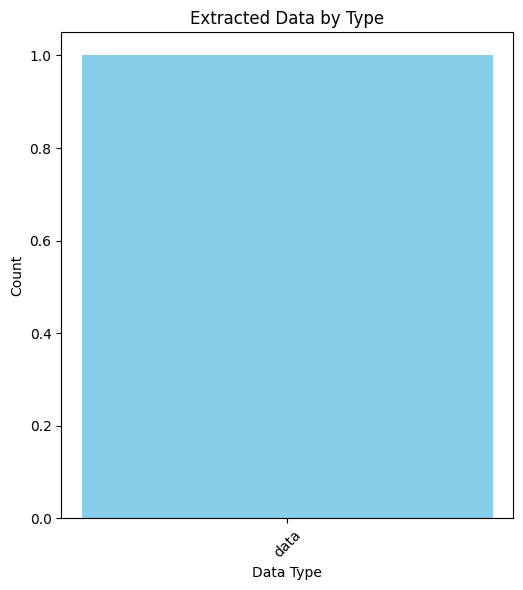

In [14]:
import matplotlib.pyplot as plt
def analyze_extraction_performance(job_data, config):
    """Analyze the performance impact of extraction settings"""
    print("📊 EXTRACTION PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    # Calculate job duration
    duration = None
    if job_data.get("started_at") and job_data.get("finished_at"):
        try:
            start = datetime.fromisoformat(job_data["started_at"].replace('Z', '+00:00'))
            end = datetime.fromisoformat(job_data["finished_at"].replace('Z', '+00:00'))
            duration = (end - start).total_seconds()
        except:
            pass
    
    # Analyze configuration
    params = job_data.get("params", {}).get("params", config)
    date_filtering_enabled = params.get("enable_date_filtering", False)
    date_range = params.get("date_range", "")
    total_requested = sum([
        params.get("max_posts", 0) if params.get("scrape_posts") else 0,
        params.get("max_likes", 0) if params.get("scrape_likes") else 0,
        params.get("max_mentions", 0) if params.get("scrape_mentions") else 0,
        params.get("max_media", 0) if params.get("scrape_media") else 0
    ])
    
    print("🔧 Configuration Analysis:")
    print(f"   Date Filtering: {'✅ Enabled' if date_filtering_enabled else '❌ Disabled'}")
    if date_filtering_enabled:
        print(f"   Date Range: {date_range or 'custom'}")
        print(f"   Early Termination: {'✅' if params.get('stop_at_date_threshold') else '❌'}")
    print(f"   Total Items Requested: {total_requested}")
    
    if duration:
        print(f"   ⏱️ Execution Time: {duration:.1f} seconds ({duration/60:.1f} minutes)")
        
        # Performance estimates
        if date_filtering_enabled:
            if date_range in ["today", "last_day"]:
                expected_time_without = duration * 10  # 90% reduction
                print(f"   📈 Estimated time without filtering: ~{expected_time_without/60:.0f} minutes")
                print(f"   🚀 Performance improvement: ~90%")
            elif date_range in ["last_week"]:
                expected_time_without = duration * 4   # 75% reduction
                print(f"   📈 Estimated time without filtering: ~{expected_time_without/60:.0f} minutes")
                print(f"   🚀 Performance improvement: ~75%")
    
    # Result analysis
    result = job_data.get("result", {})
    if isinstance(result, dict):
        actual_extracted = 0
        extraction_breakdown = {}
        
        for key, value in result.items():
            if isinstance(value, list):
                count = len(value)
                actual_extracted += count
                extraction_breakdown[key] = count
        
        print(f"\n📊 Extraction Results:")
        print(f"   Total Items Extracted: {actual_extracted}")
        
        for data_type, count in extraction_breakdown.items():
            print(f"   • {data_type}: {count} items")
        
        if total_requested > 0:
            efficiency = (actual_extracted / total_requested) * 100
            print(f"   📈 Extraction Efficiency: {efficiency:.1f}%")
        
        # Create visualization if we have data
        if extraction_breakdown:
            plt.figure(figsize=(10, 6))
            
            # Bar chart of extracted data
            plt.subplot(1, 2, 1)
            data_types = list(extraction_breakdown.keys())
            counts = list(extraction_breakdown.values())
            
            plt.bar(data_types, counts, color='skyblue')
            plt.title('Extracted Data by Type')
            plt.xlabel('Data Type')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            
            # Pie chart if multiple data types
            if len(extraction_breakdown) > 1:
                plt.subplot(1, 2, 2)
                plt.pie(counts, labels=data_types, autopct='%1.1f%%')
                plt.title('Data Distribution')
            
            plt.tight_layout()
            plt.show()

# Analyze performance if job data is available
if current_job_id:
    job_data = check_job_status(current_job_id)
    if job_data and job_data.get("status") == "finished":
        analyze_extraction_performance(job_data, extraction_config)
    else:
        print("📊 Performance analysis will be available when job completes")
else:
    print("📊 No job data available for performance analysis")

## 🎯 Manual Variable Inspection

**Use the cells below to manually inspect specific variables and data:**

In [15]:
# Manual variable inspection area
print("🔍 MANUAL VARIABLE INSPECTION")
print("=" * 40)

print("Available variables for inspection:")
print(f"   • extraction_config: {type(extraction_config)}")
print(f"   • current_job_id: {current_job_id}")
print(f"   • result_files: {len(result_files) if 'result_files' in locals() else 0} files")

# Display current configuration
print("\n📋 Current extraction_config:")
display(JSON(extraction_config))

🔍 MANUAL VARIABLE INSPECTION
Available variables for inspection:
   • extraction_config: <class 'dict'>
   • current_job_id: 7cdd033f153d439cb616a8953c7cb728
   • result_files: 4 files

📋 Current extraction_config:


NameError: name 'JSON' is not defined

In [ ]:
# Inspect specific job status
if current_job_id:
    print(f"📊 Job Status for {current_job_id}:")
    job_status = check_job_status(current_job_id)
    if job_status:
        display(JSON(job_status))
else:
    print("No active job to inspect")

In [ ]:
# Inspect result files list
if 'result_files' in locals() and result_files:
    print(f"📁 Result files ({len(result_files)} found):")
    for i, file_path in enumerate(result_files):
        size = os.path.getsize(file_path) if os.path.exists(file_path) else 0
        print(f"   {i+1}. {os.path.basename(file_path)} ({size} bytes)")
        print(f"      Path: {file_path}")
else:
    print("No result files to inspect")

In [ ]:
# Load and inspect specific JSON result file
# Modify the index below to inspect different files
file_index = 0  # Change this to inspect different files

if 'result_files' in locals() and result_files and len(result_files) > file_index:
    target_file = result_files[file_index]
    print(f"📄 Inspecting file {file_index + 1}: {os.path.basename(target_file)}")
    
    if target_file.endswith('.json'):
        try:
            with open(target_file, 'r') as f:
                data = json.load(f)
            
            print(f"📊 Data structure: {type(data)}")
            if isinstance(data, dict):
                print(f"Keys: {list(data.keys())}")
            elif isinstance(data, list):
                print(f"List length: {len(data)}")
                if len(data) > 0:
                    print(f"First item type: {type(data[0])}")
                    if isinstance(data[0], dict):
                        print(f"First item keys: {list(data[0].keys())}")
            
            # Display the data
            print("\n🔍 RAW DATA:")
            display(JSON(data))
            
        except Exception as e:
            print(f"❌ Error loading JSON: {e}")
    else:
        print("Selected file is not a JSON file")
else:
    print("No files available or invalid file index")
    print(f"Available files: {len(result_files) if 'result_files' in locals() else 0}")

## 💡 Usage Tips and Next Steps

### 🔧 Configuration Tips
- **For daily monitoring**: Use `date_range: "today"` or `"last_day"`
- **For weekly reports**: Use `date_range: "last_week"`
- **For monthly analysis**: Use `date_range: "last_month"`
- **For custom periods**: Set `start_date` and `end_date`
- **For maximum speed**: Enable `stop_at_date_threshold: True`

### 📊 Analysis Tips
- Check the performance analysis chart to see extraction efficiency
- Inspect log files for date filtering activity
- Use manual variable inspection to examine specific data points
- Compare extraction times with and without date filtering

### 🚀 Next Steps
1. Modify the `extraction_config` above for different accounts or settings
2. Run cells again to test different configurations
3. Use the manual inspection cells to examine result data
4. Create custom analysis using the extracted data

---

**🎉 Twitter Analysis Notebook Complete!**

*This notebook provides comprehensive tools for Twitter data extraction with advanced date filtering capabilities. Modify the configuration above and re-run cells to experiment with different settings.*